In [1]:
import music21
import pathlib
music21.environment.set('musescoreDirectPNGPath', 
                        pathlib.PosixPath('/Applications/MuseScore 4.app/Contents/MacOS/mscore'))
from music21 import *

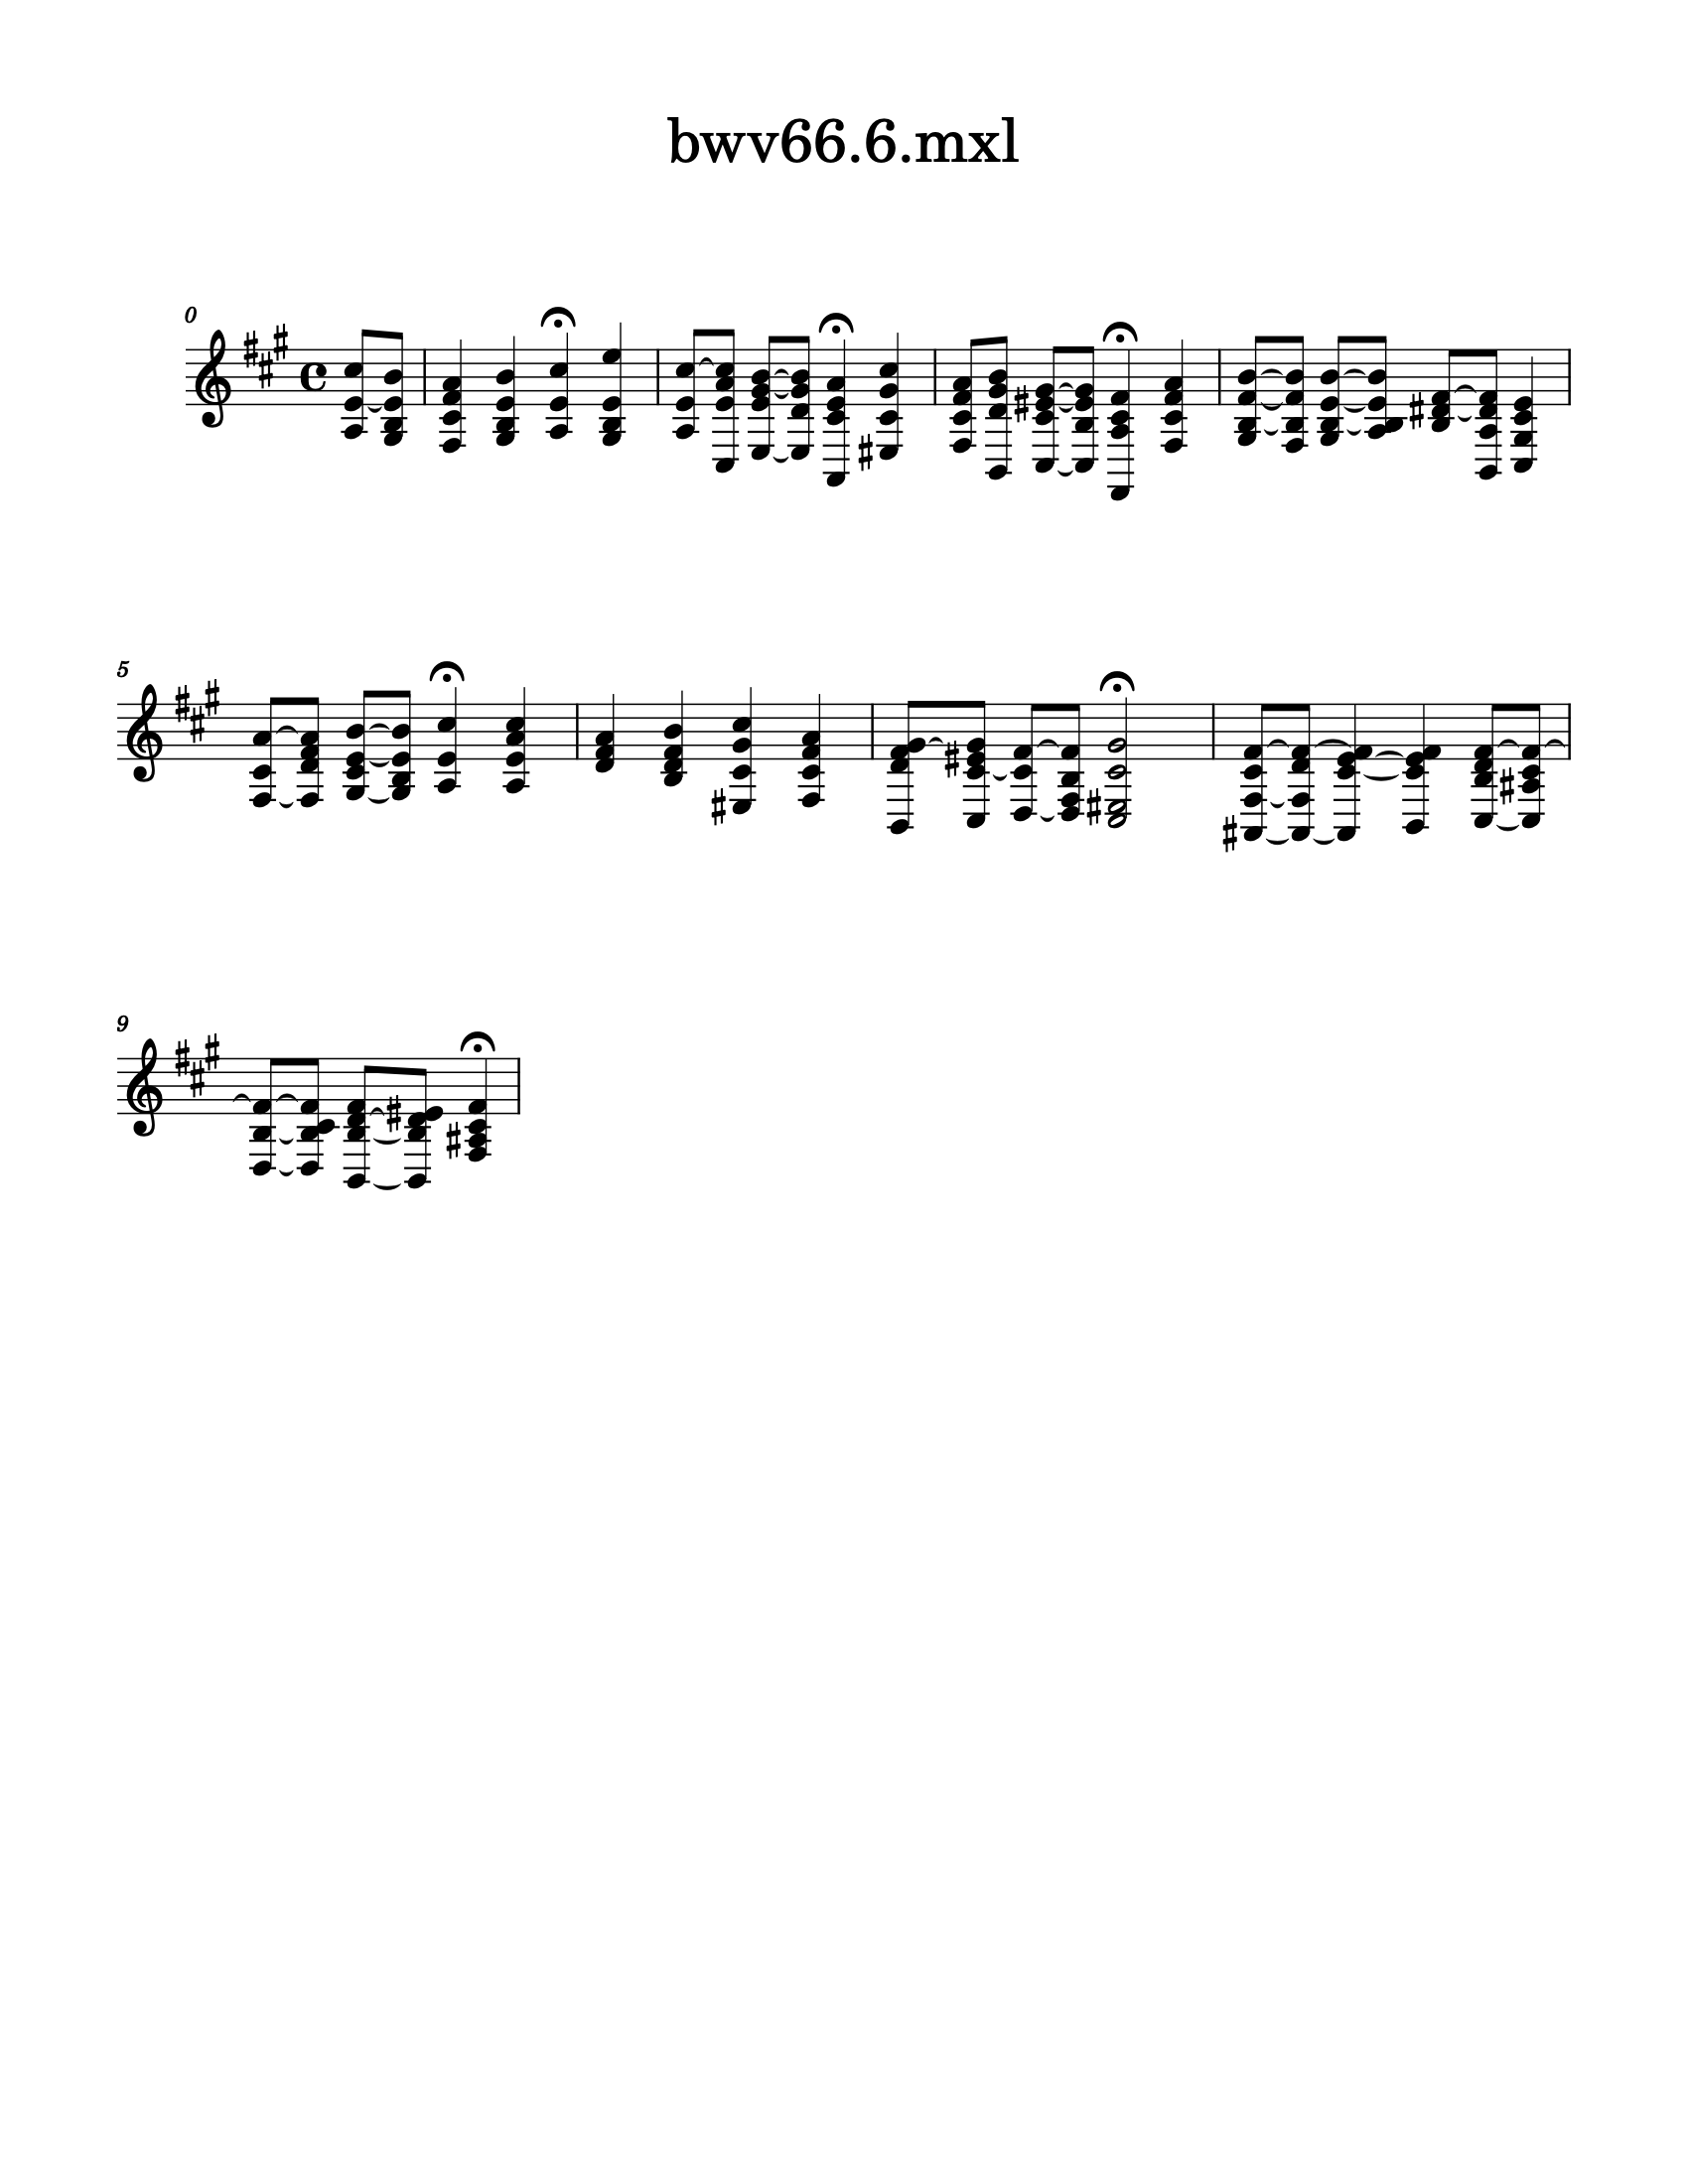

In [2]:
b = corpus.parse('bwv66.6')
bChords = b.chordify()
bChords.show()

In [3]:
for thisChord in bChords.recurse().getElementsByClass(chord.Chord):
    if thisChord.isDominantSeventh():
        print(thisChord.measureNumber, thisChord.beatStr, thisChord)

2 2 1/2 <music21.chord.Chord E3 D4 G#4 B4>
3 2 1/2 <music21.chord.Chord C#3 B3 E#4 G#4>
4 3 1/2 <music21.chord.Chord B2 A3 D#4 F#4>
8 2 <music21.chord.Chord A#2 C#4 E4 F#4>


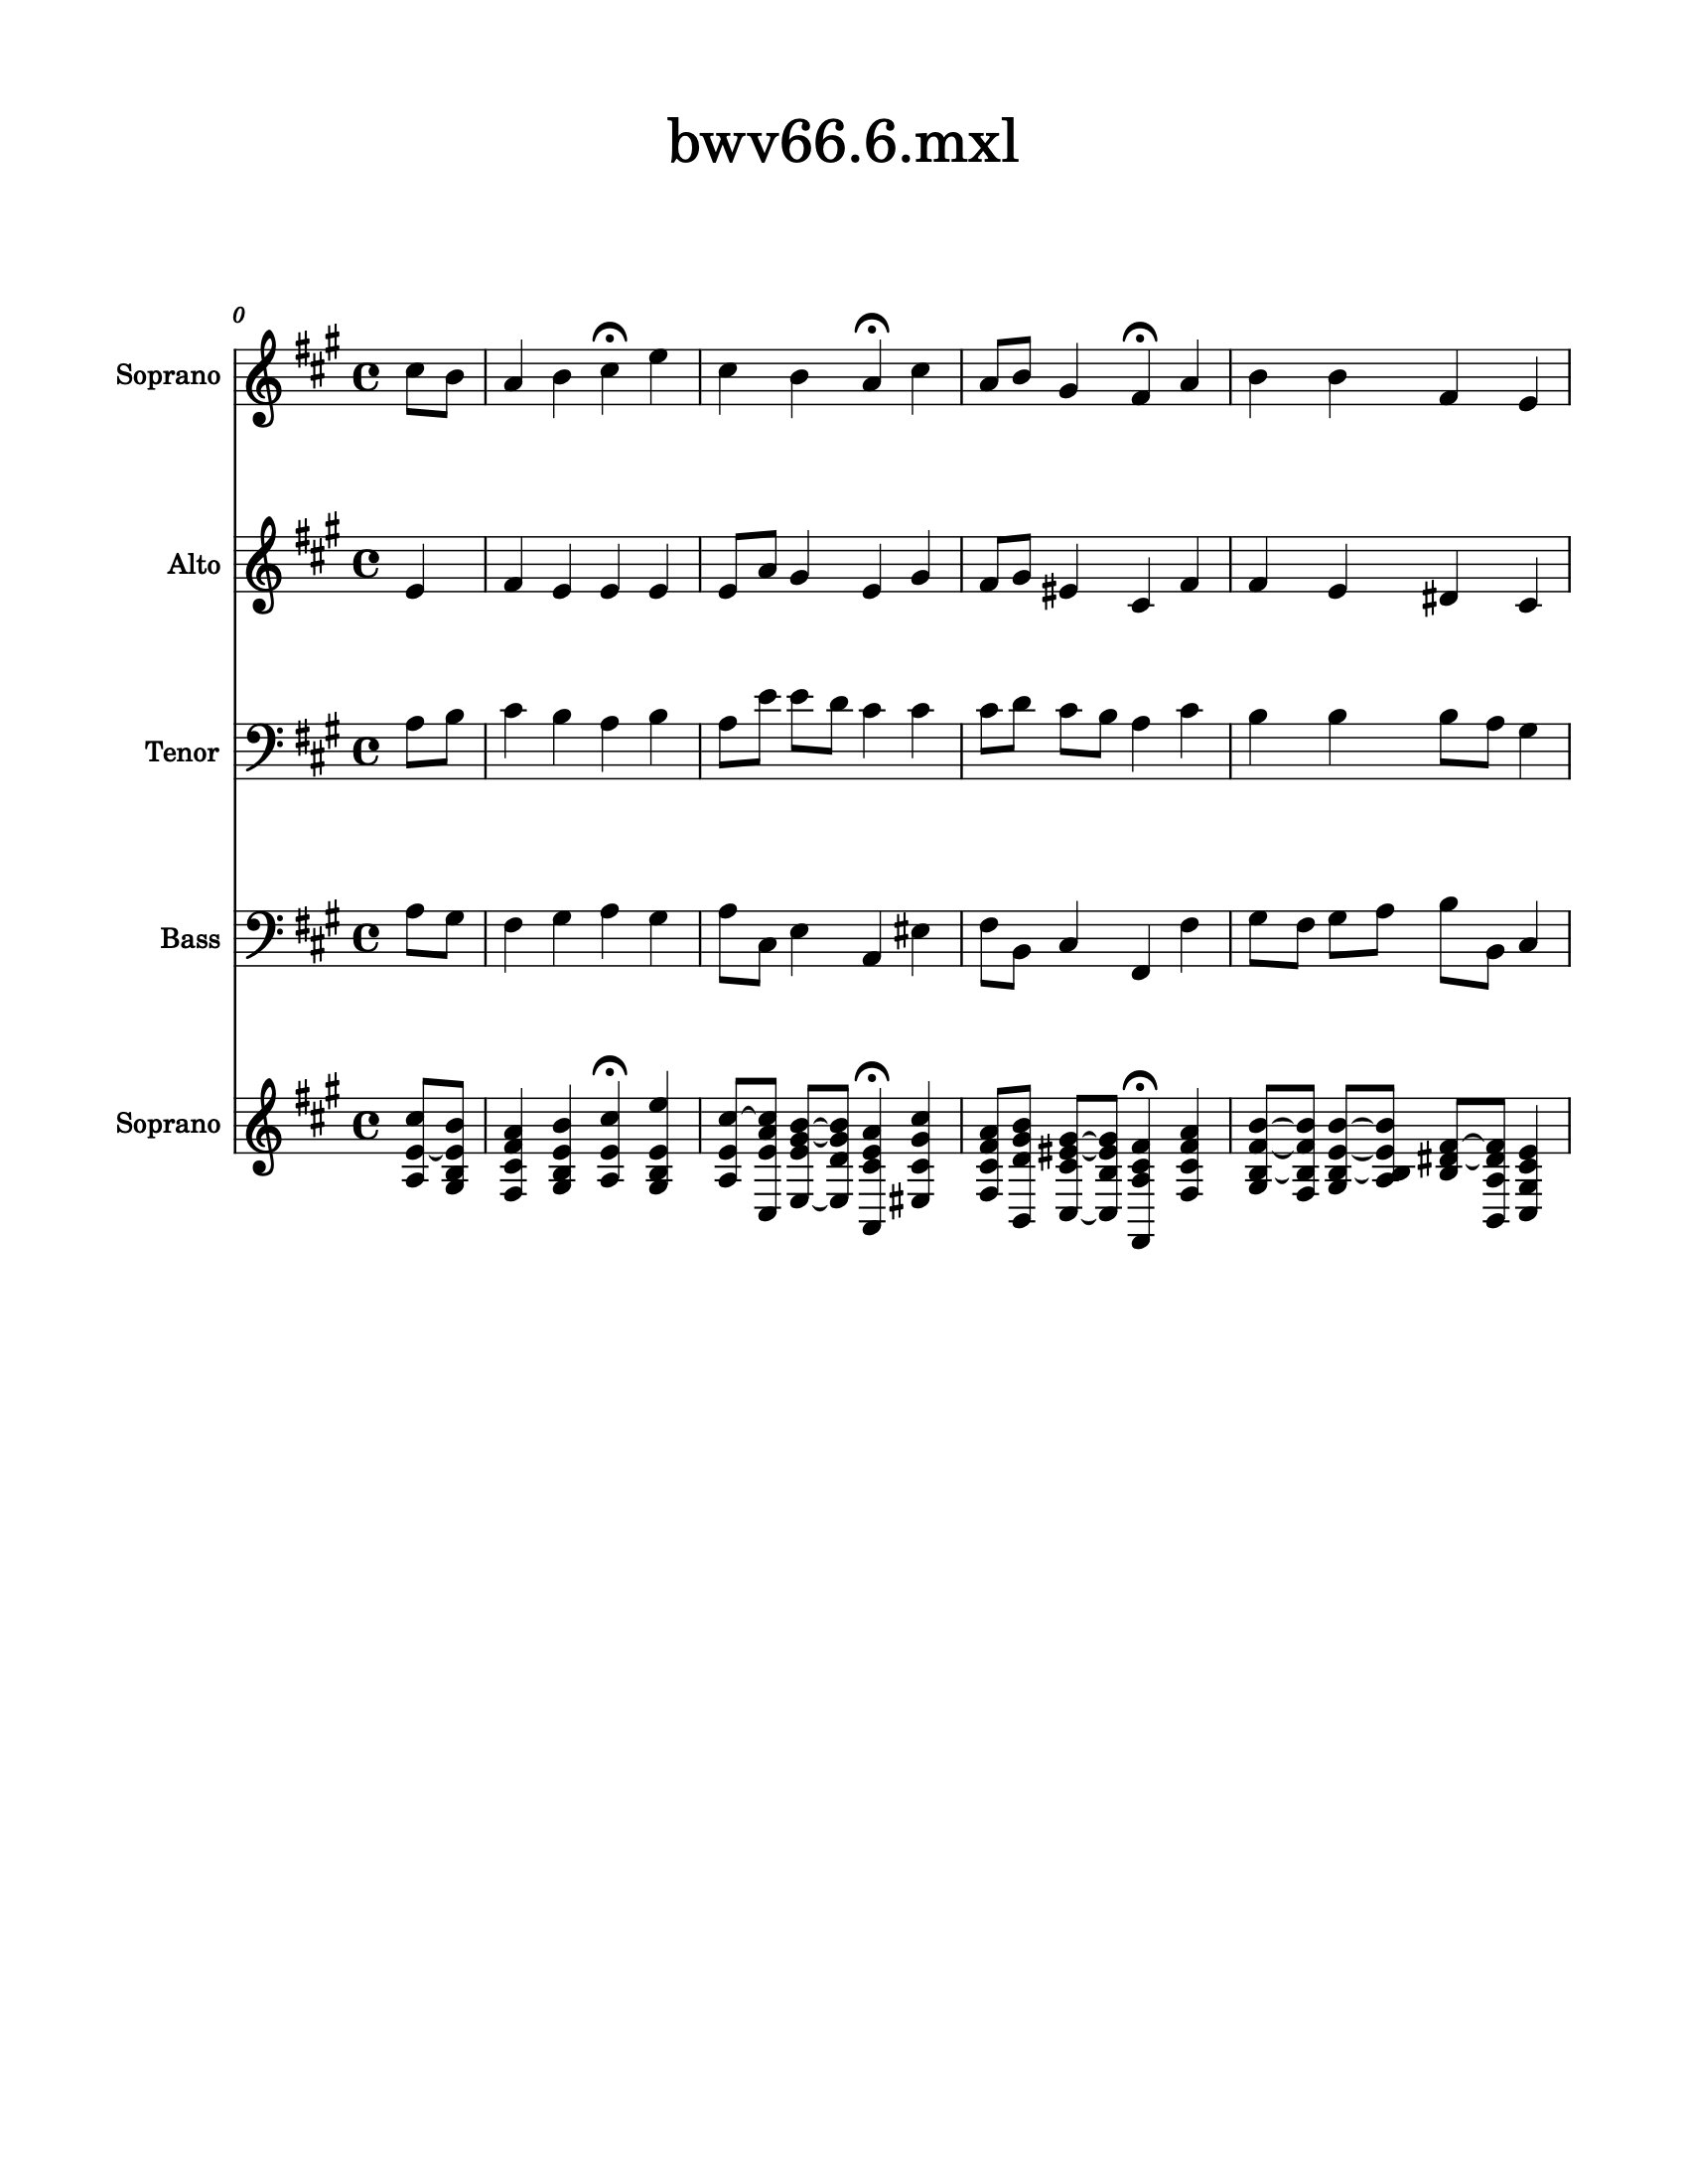

In [4]:
b.insert(0, bChords)
b.measures(0, 4).show()

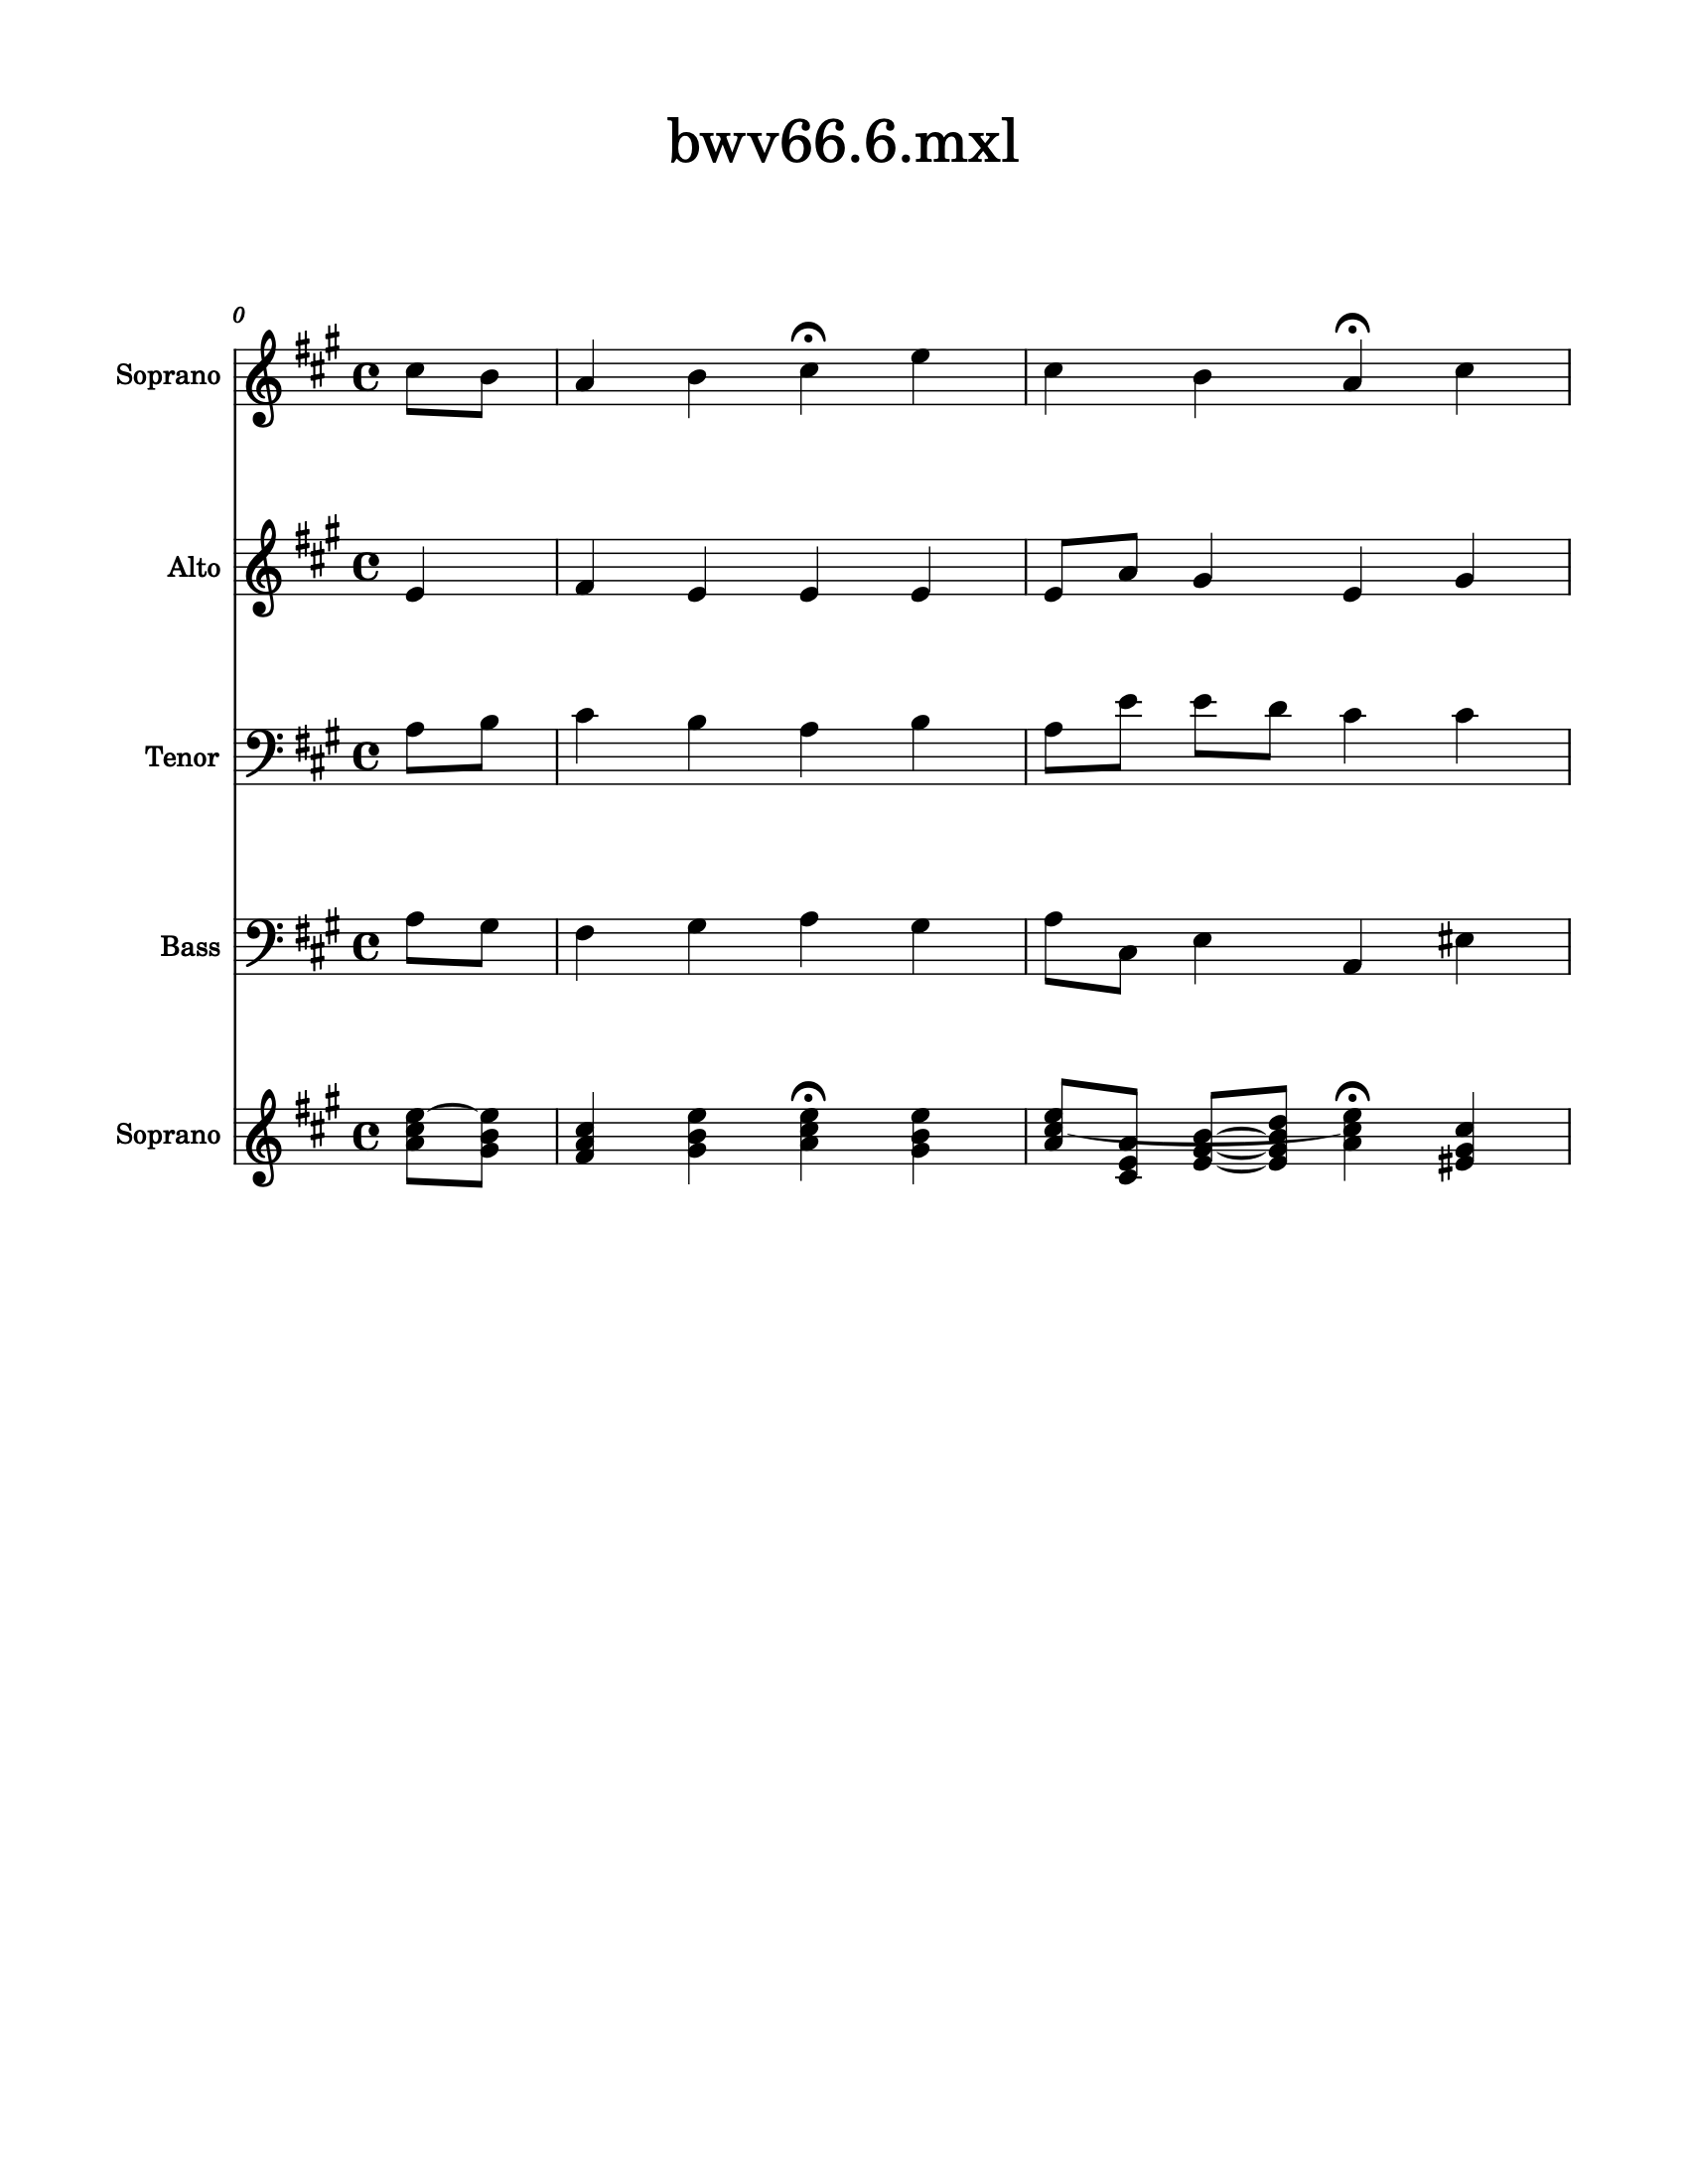

In [5]:
for c in bChords.recurse().getElementsByClass(chord.Chord):
    c.closedPosition(forceOctave=4, inPlace=True)

b.measures(0, 2).show()

In [6]:
bChords.measures(0, 2).show('text')

{0.0} <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>
{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of f# minor>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord G#4 B4 E5>
{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.chord.Chord F#4 A4 C#5>
    {1.0} <music21.chord.Chord G#4 B4 E5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord G#4 B4 E5>
{5.0} <music21.stream.Measure 2 offset=5.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord C#4 E4 A4>
    {1.0} <music21.chord.Chord E4 G#4 B4>
    {1.5} <music21.chord.Chord E4 G#4 B4 D5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord E#4 G#4 C#5>


In [8]:
o = corpus.parse('josquin/laDeplorationDeLaMorteDeJohannesOckeghem')
for s in o:
    print(s)

<music21.stream.Score 0x114dad120>
<music21.stream.Score 0x115e63730>
<music21.stream.Score 0x115f83ac0>
<music21.stream.Score 0x11601c280>
<music21.stream.Score 0x116070a30>


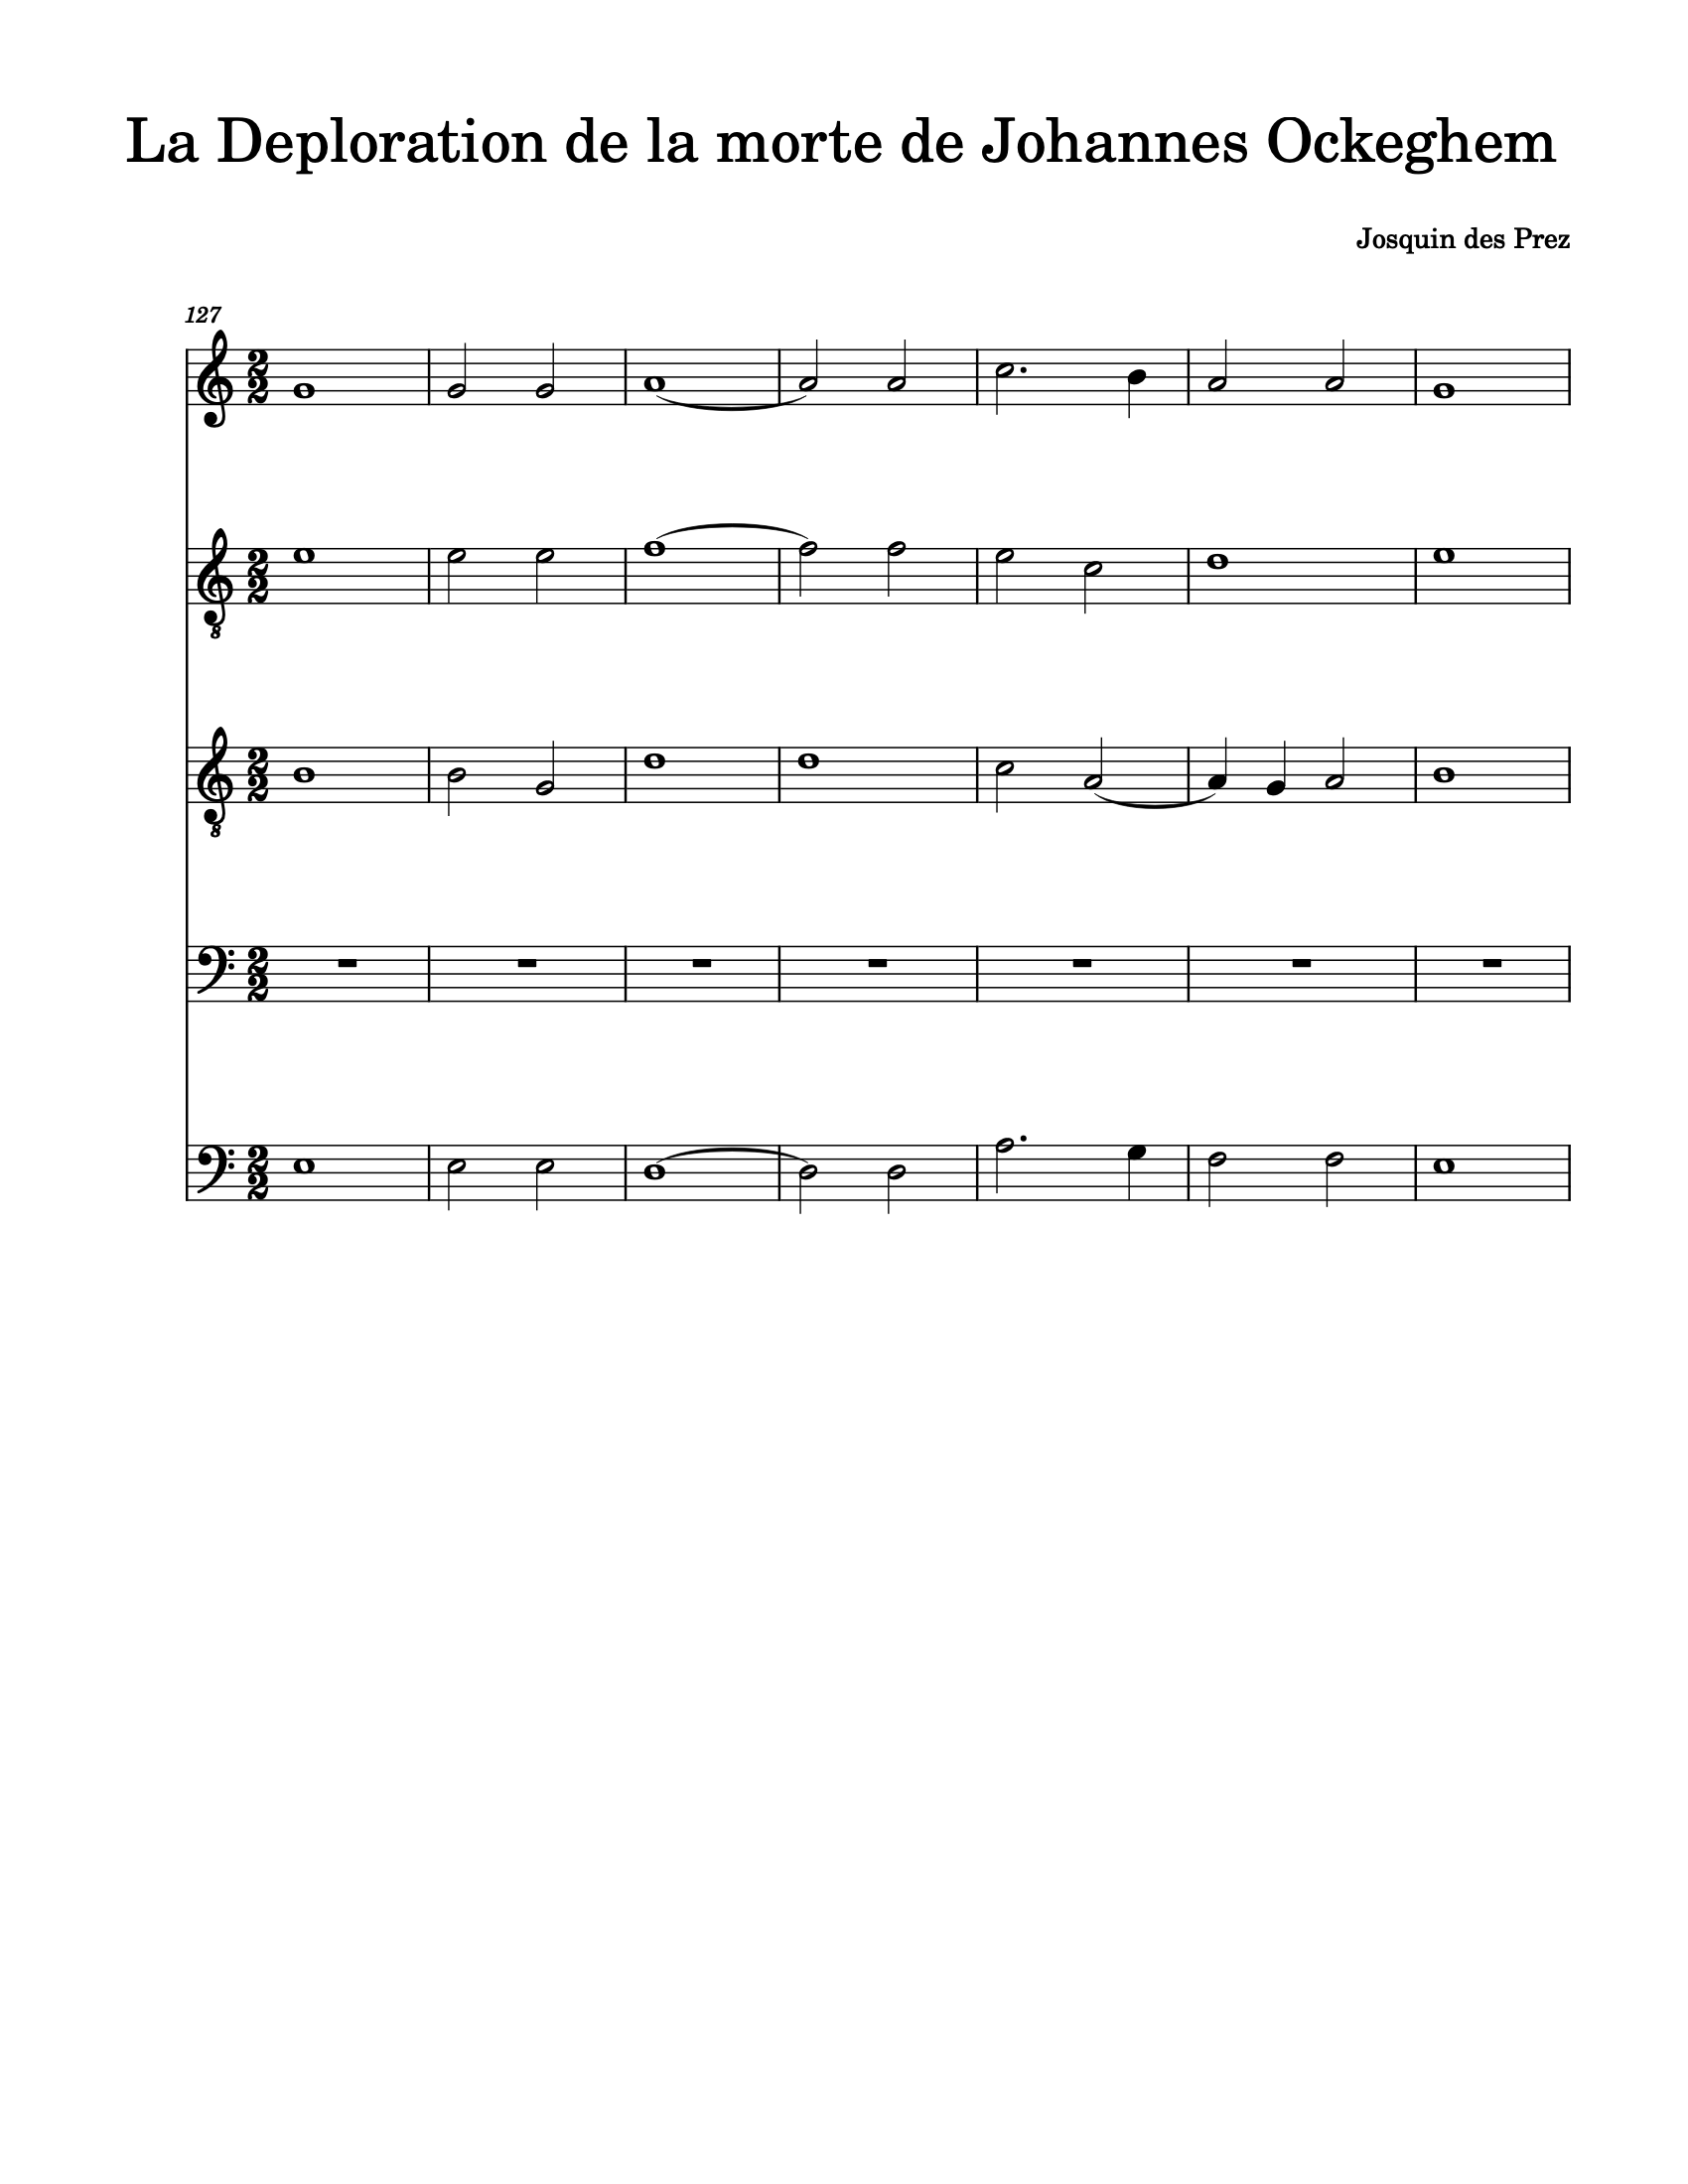

In [28]:
scoreExcerpt = ()
mergedScores = o.mergeScores()
scoreExcerpt = mergedScores.measures(127, 133)
scoreExcerpt.show()

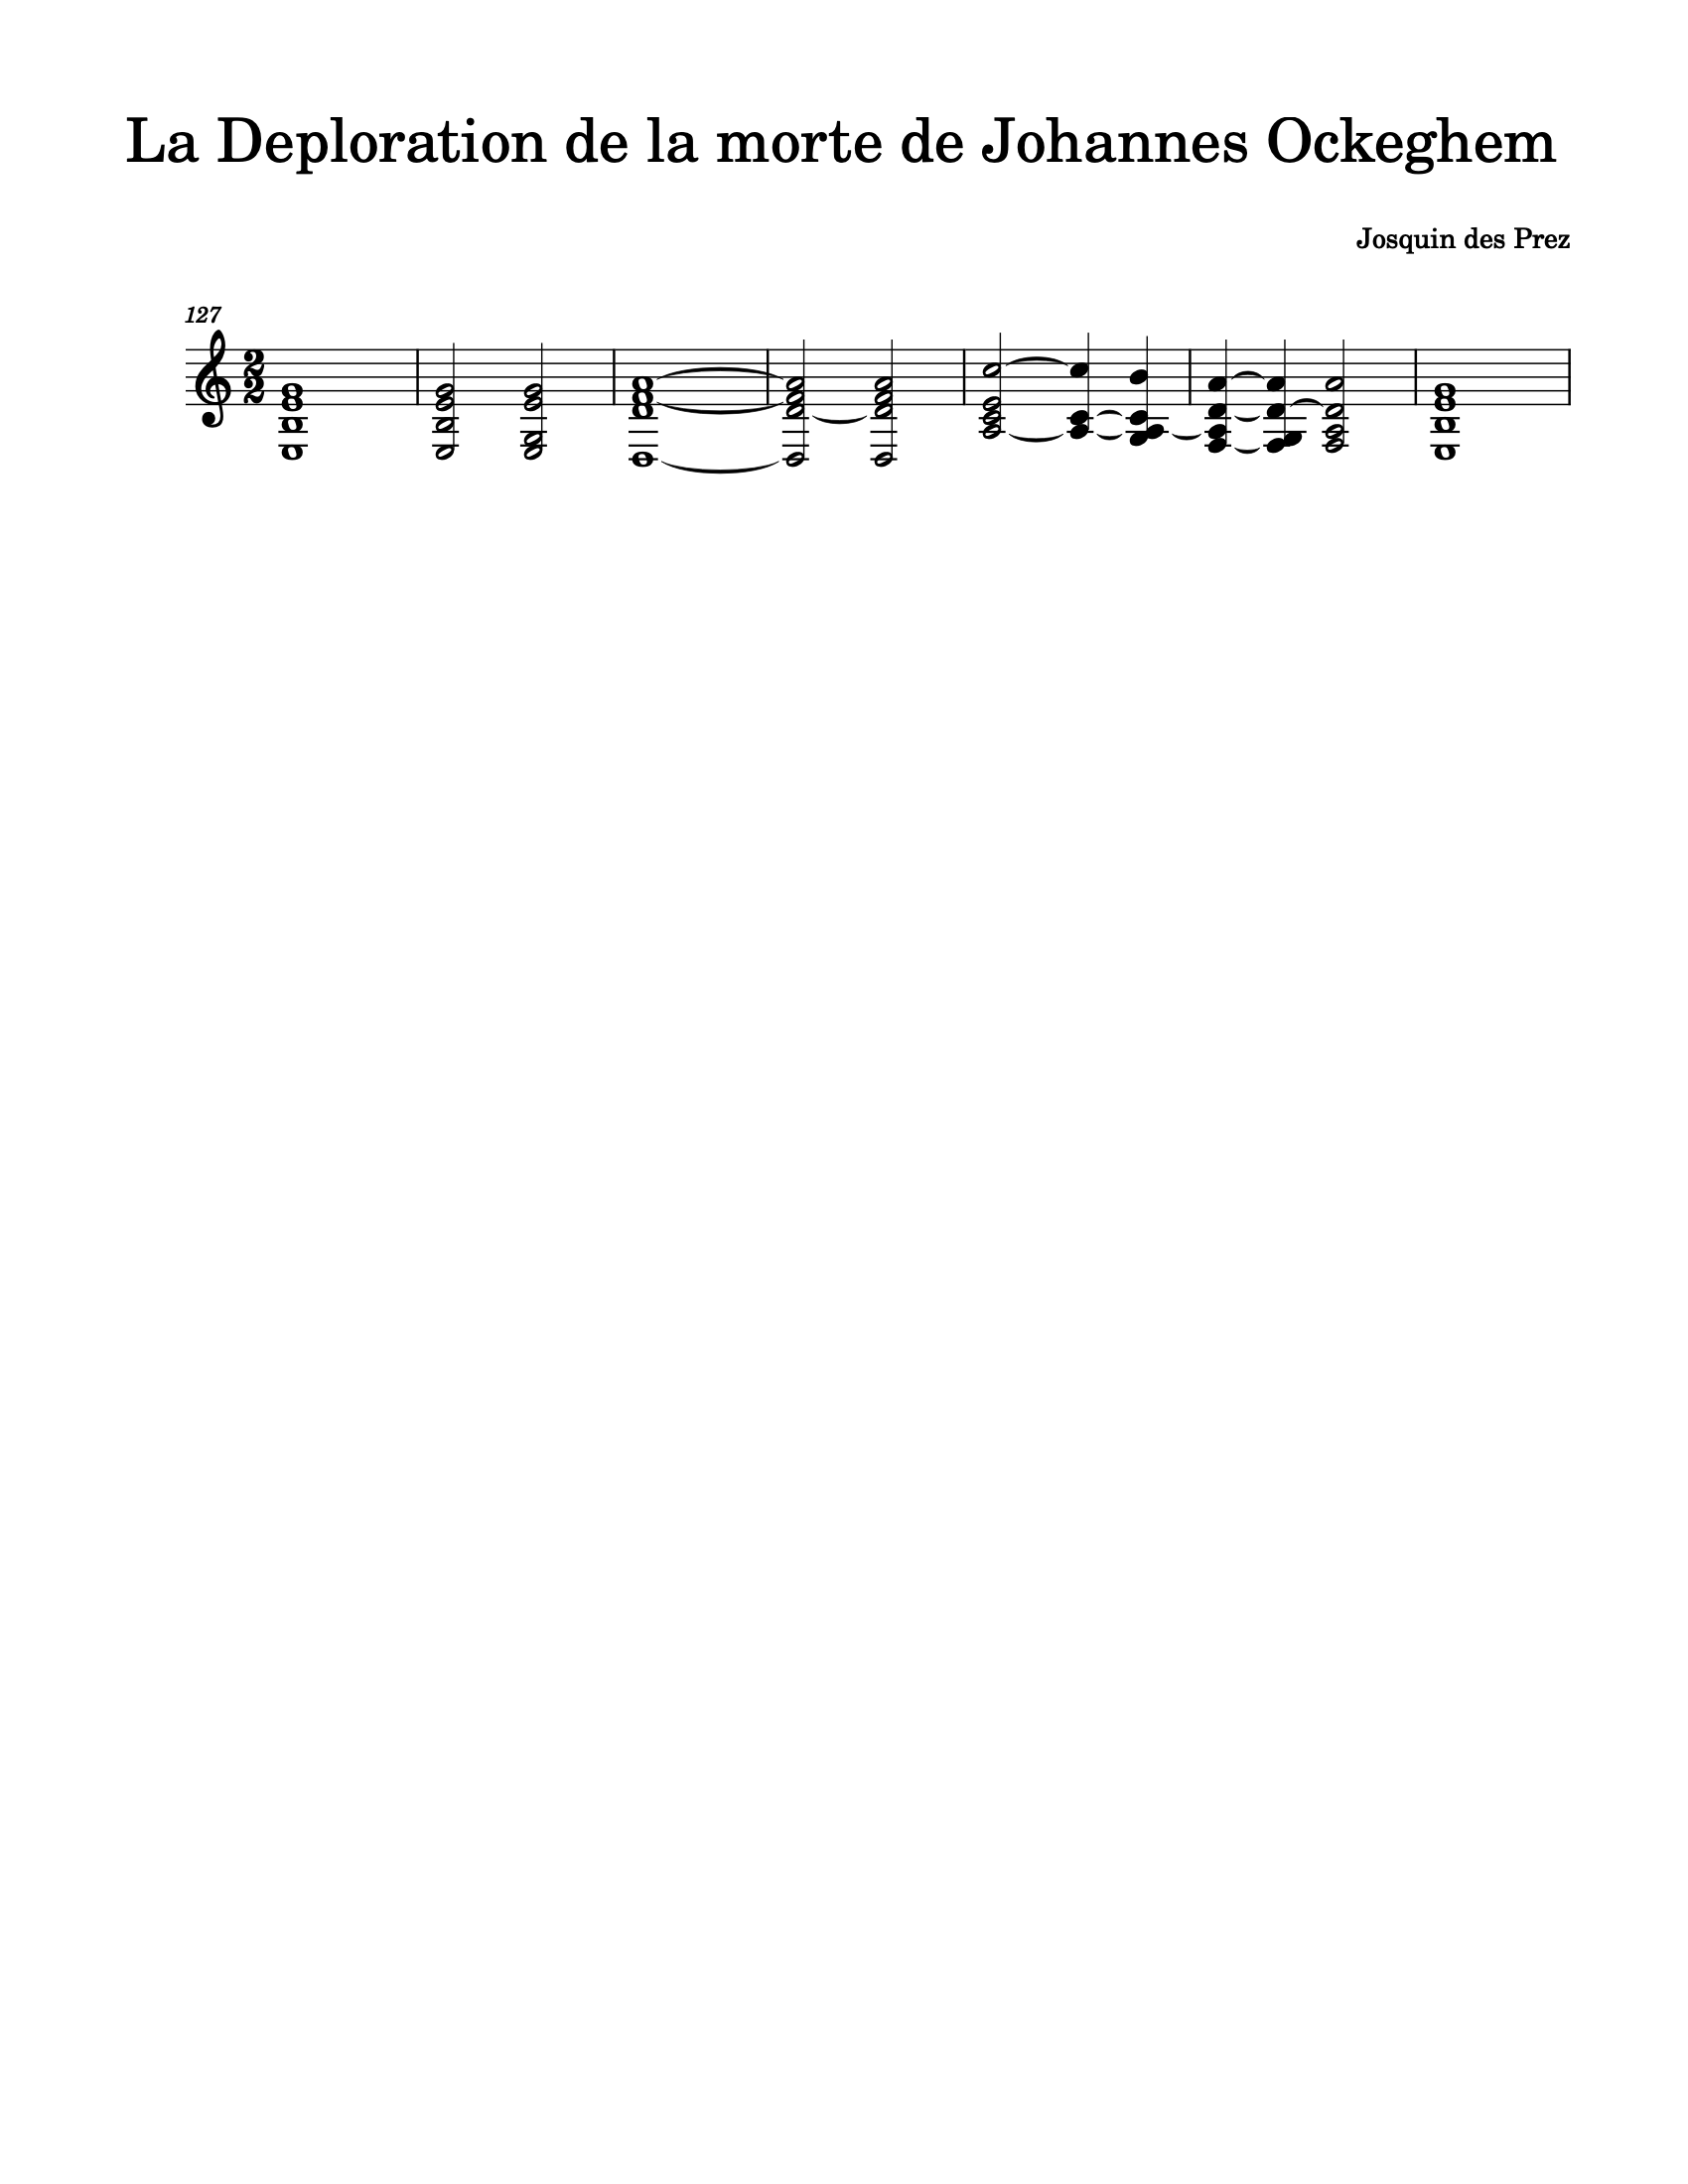

In [29]:
reduction = scoreExcerpt.chordify()
reduction.show()

In [30]:
for c in reduction.recurse().getElementsByClass(chord.Chord):
    c.closedPosition(forceOctave=4, inPlace=True)
    c.annotateIntervals(inPlace=True)

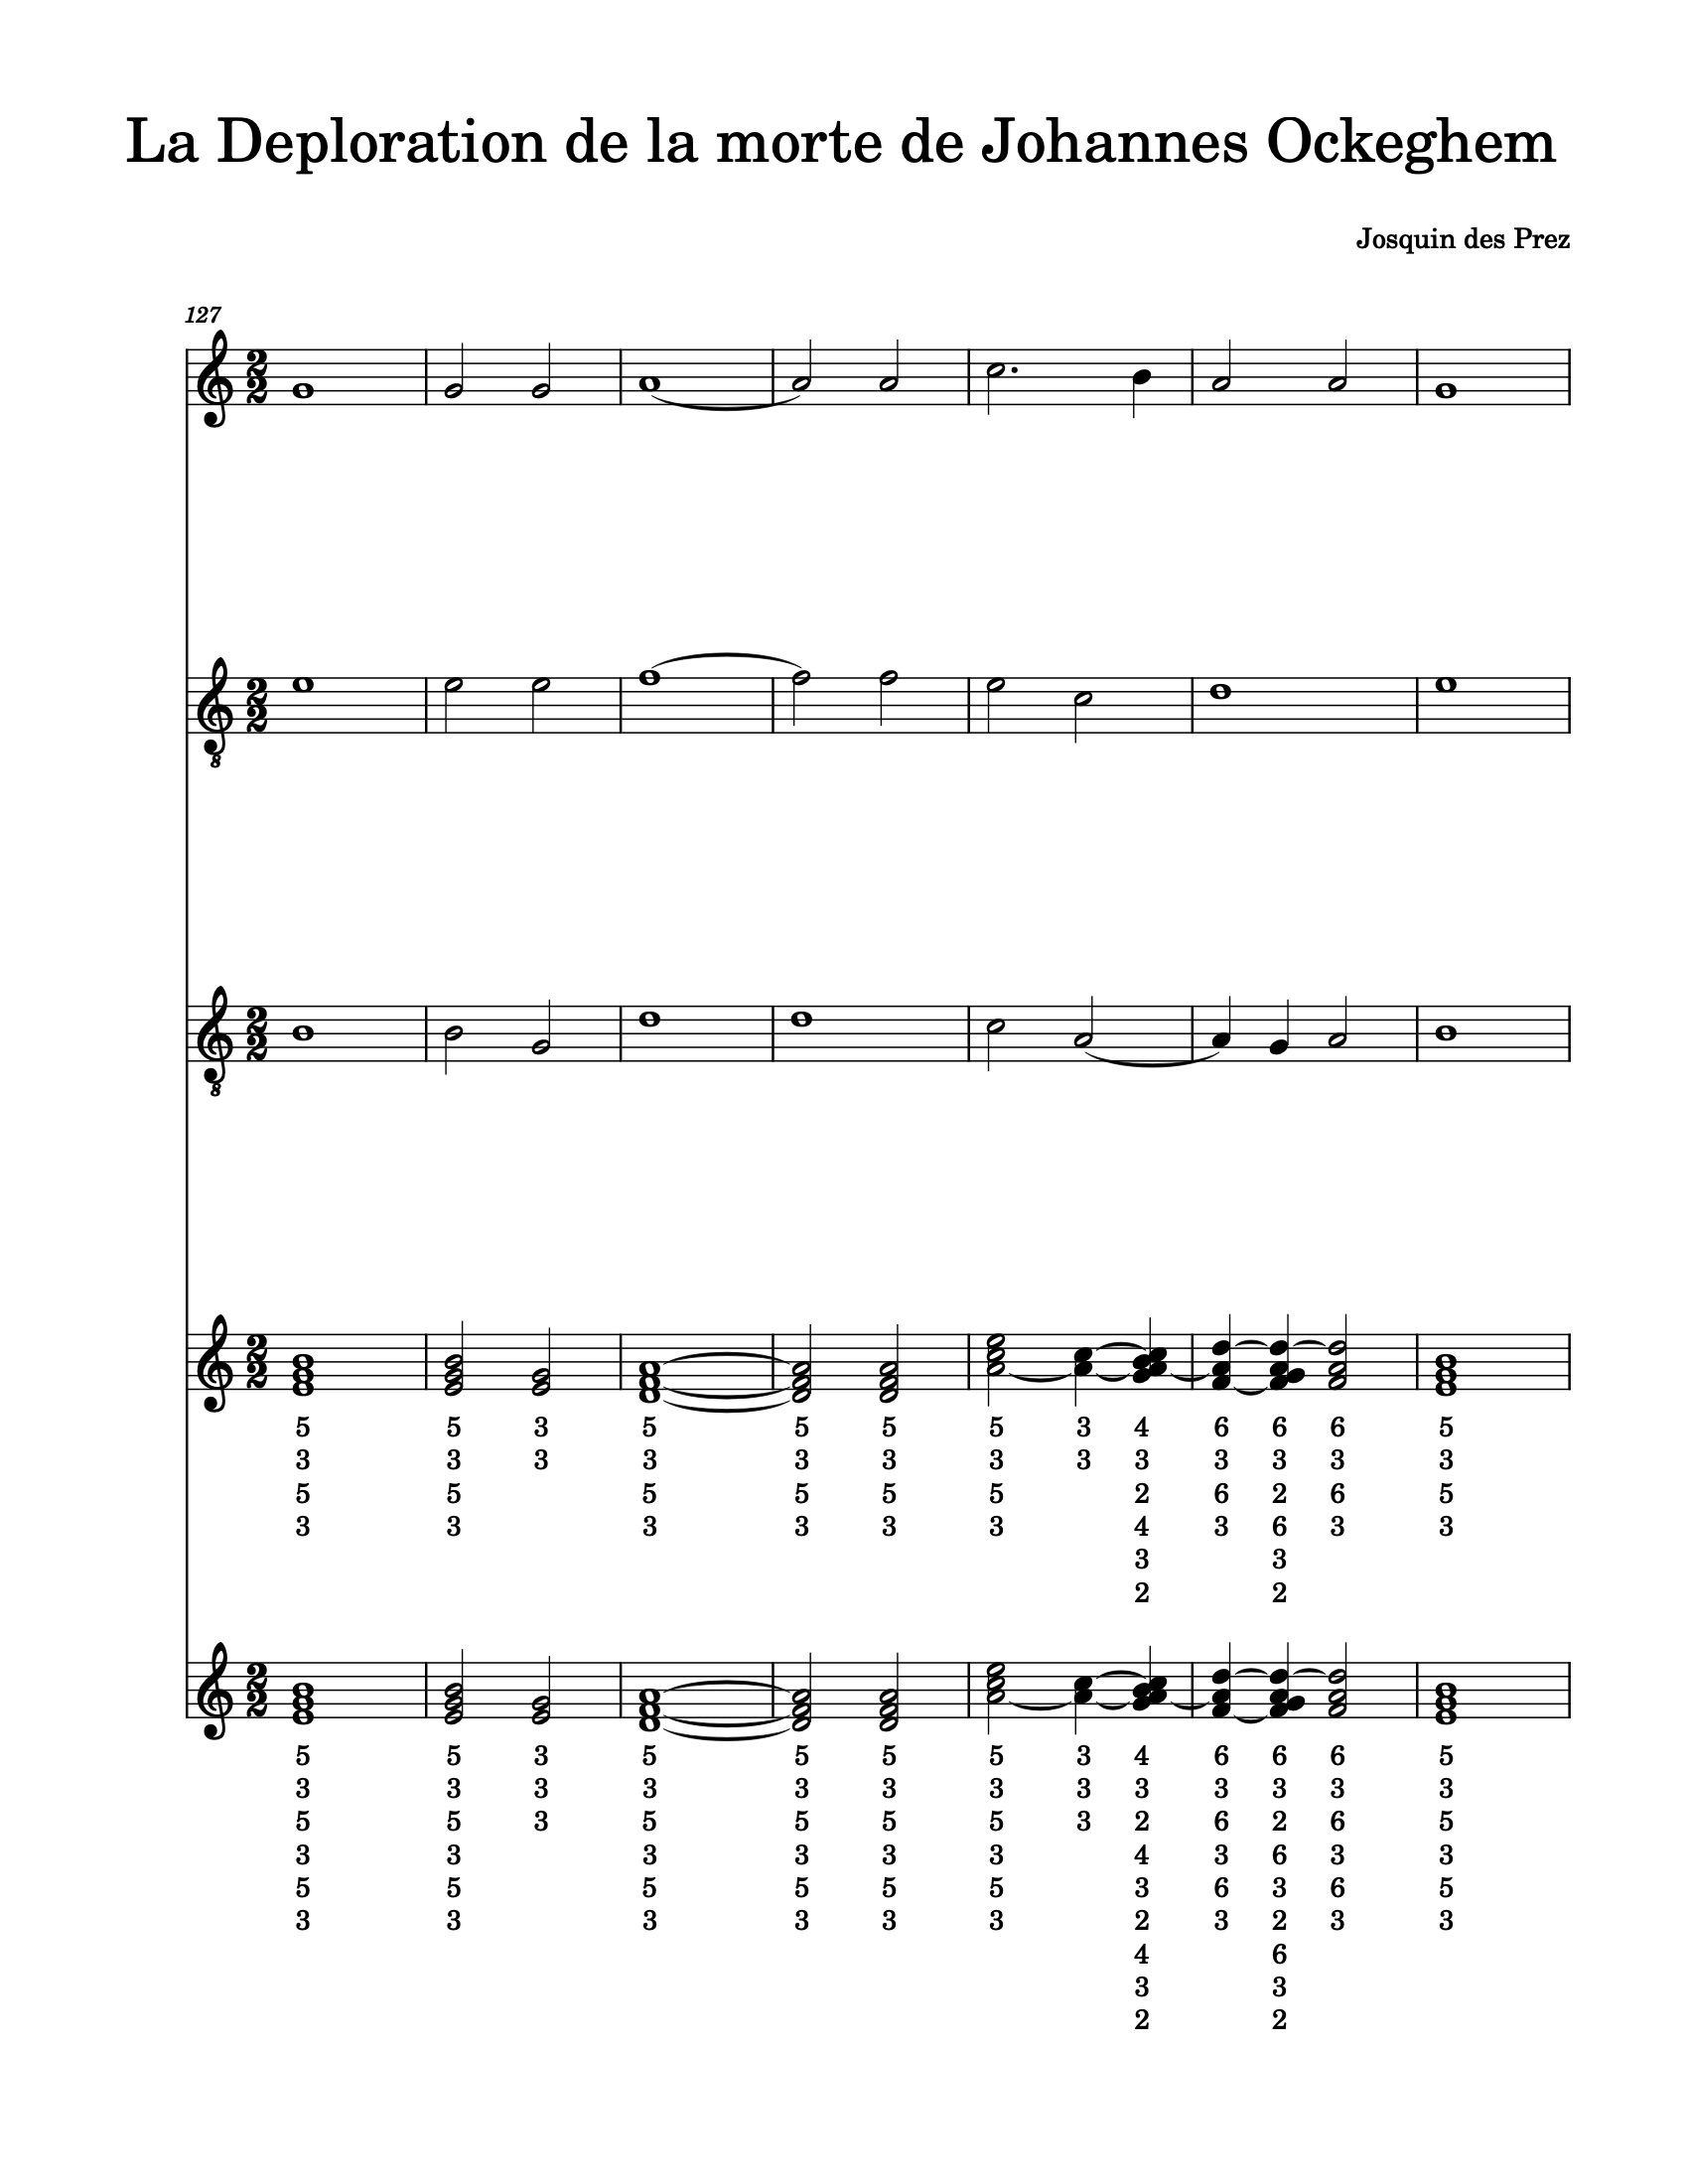

In [24]:
scoreExcerpt.insert(0, reduction)
emptyPart = scoreExcerpt.parts[3]
scoreExcerpt.remove(emptyPart)
scoreExcerpt.show()

In [31]:
for c in reduction.recurse().getElementsByClass('Chord'):
    print(c, end=" ")
    for l in c.lyrics:
        print(l.text, end=" ")
    print()

<music21.chord.Chord E4 G4 B4> 5 3 
<music21.chord.Chord E4 G4 B4> 5 3 
<music21.chord.Chord E4 G4> 3 
<music21.chord.Chord D4 F4 A4> 5 3 
<music21.chord.Chord D4 F4 A4> 5 3 
<music21.chord.Chord D4 F4 A4> 5 3 
<music21.chord.Chord A4 C5 E5> 5 3 
<music21.chord.Chord A4 C5> 3 
<music21.chord.Chord G4 A4 B4 C5> 4 3 2 
<music21.chord.Chord F4 A4 D5> 6 3 
<music21.chord.Chord F4 G4 A4 D5> 6 3 2 
<music21.chord.Chord F4 A4 D5> 6 3 
<music21.chord.Chord E4 G4 B4> 5 3 


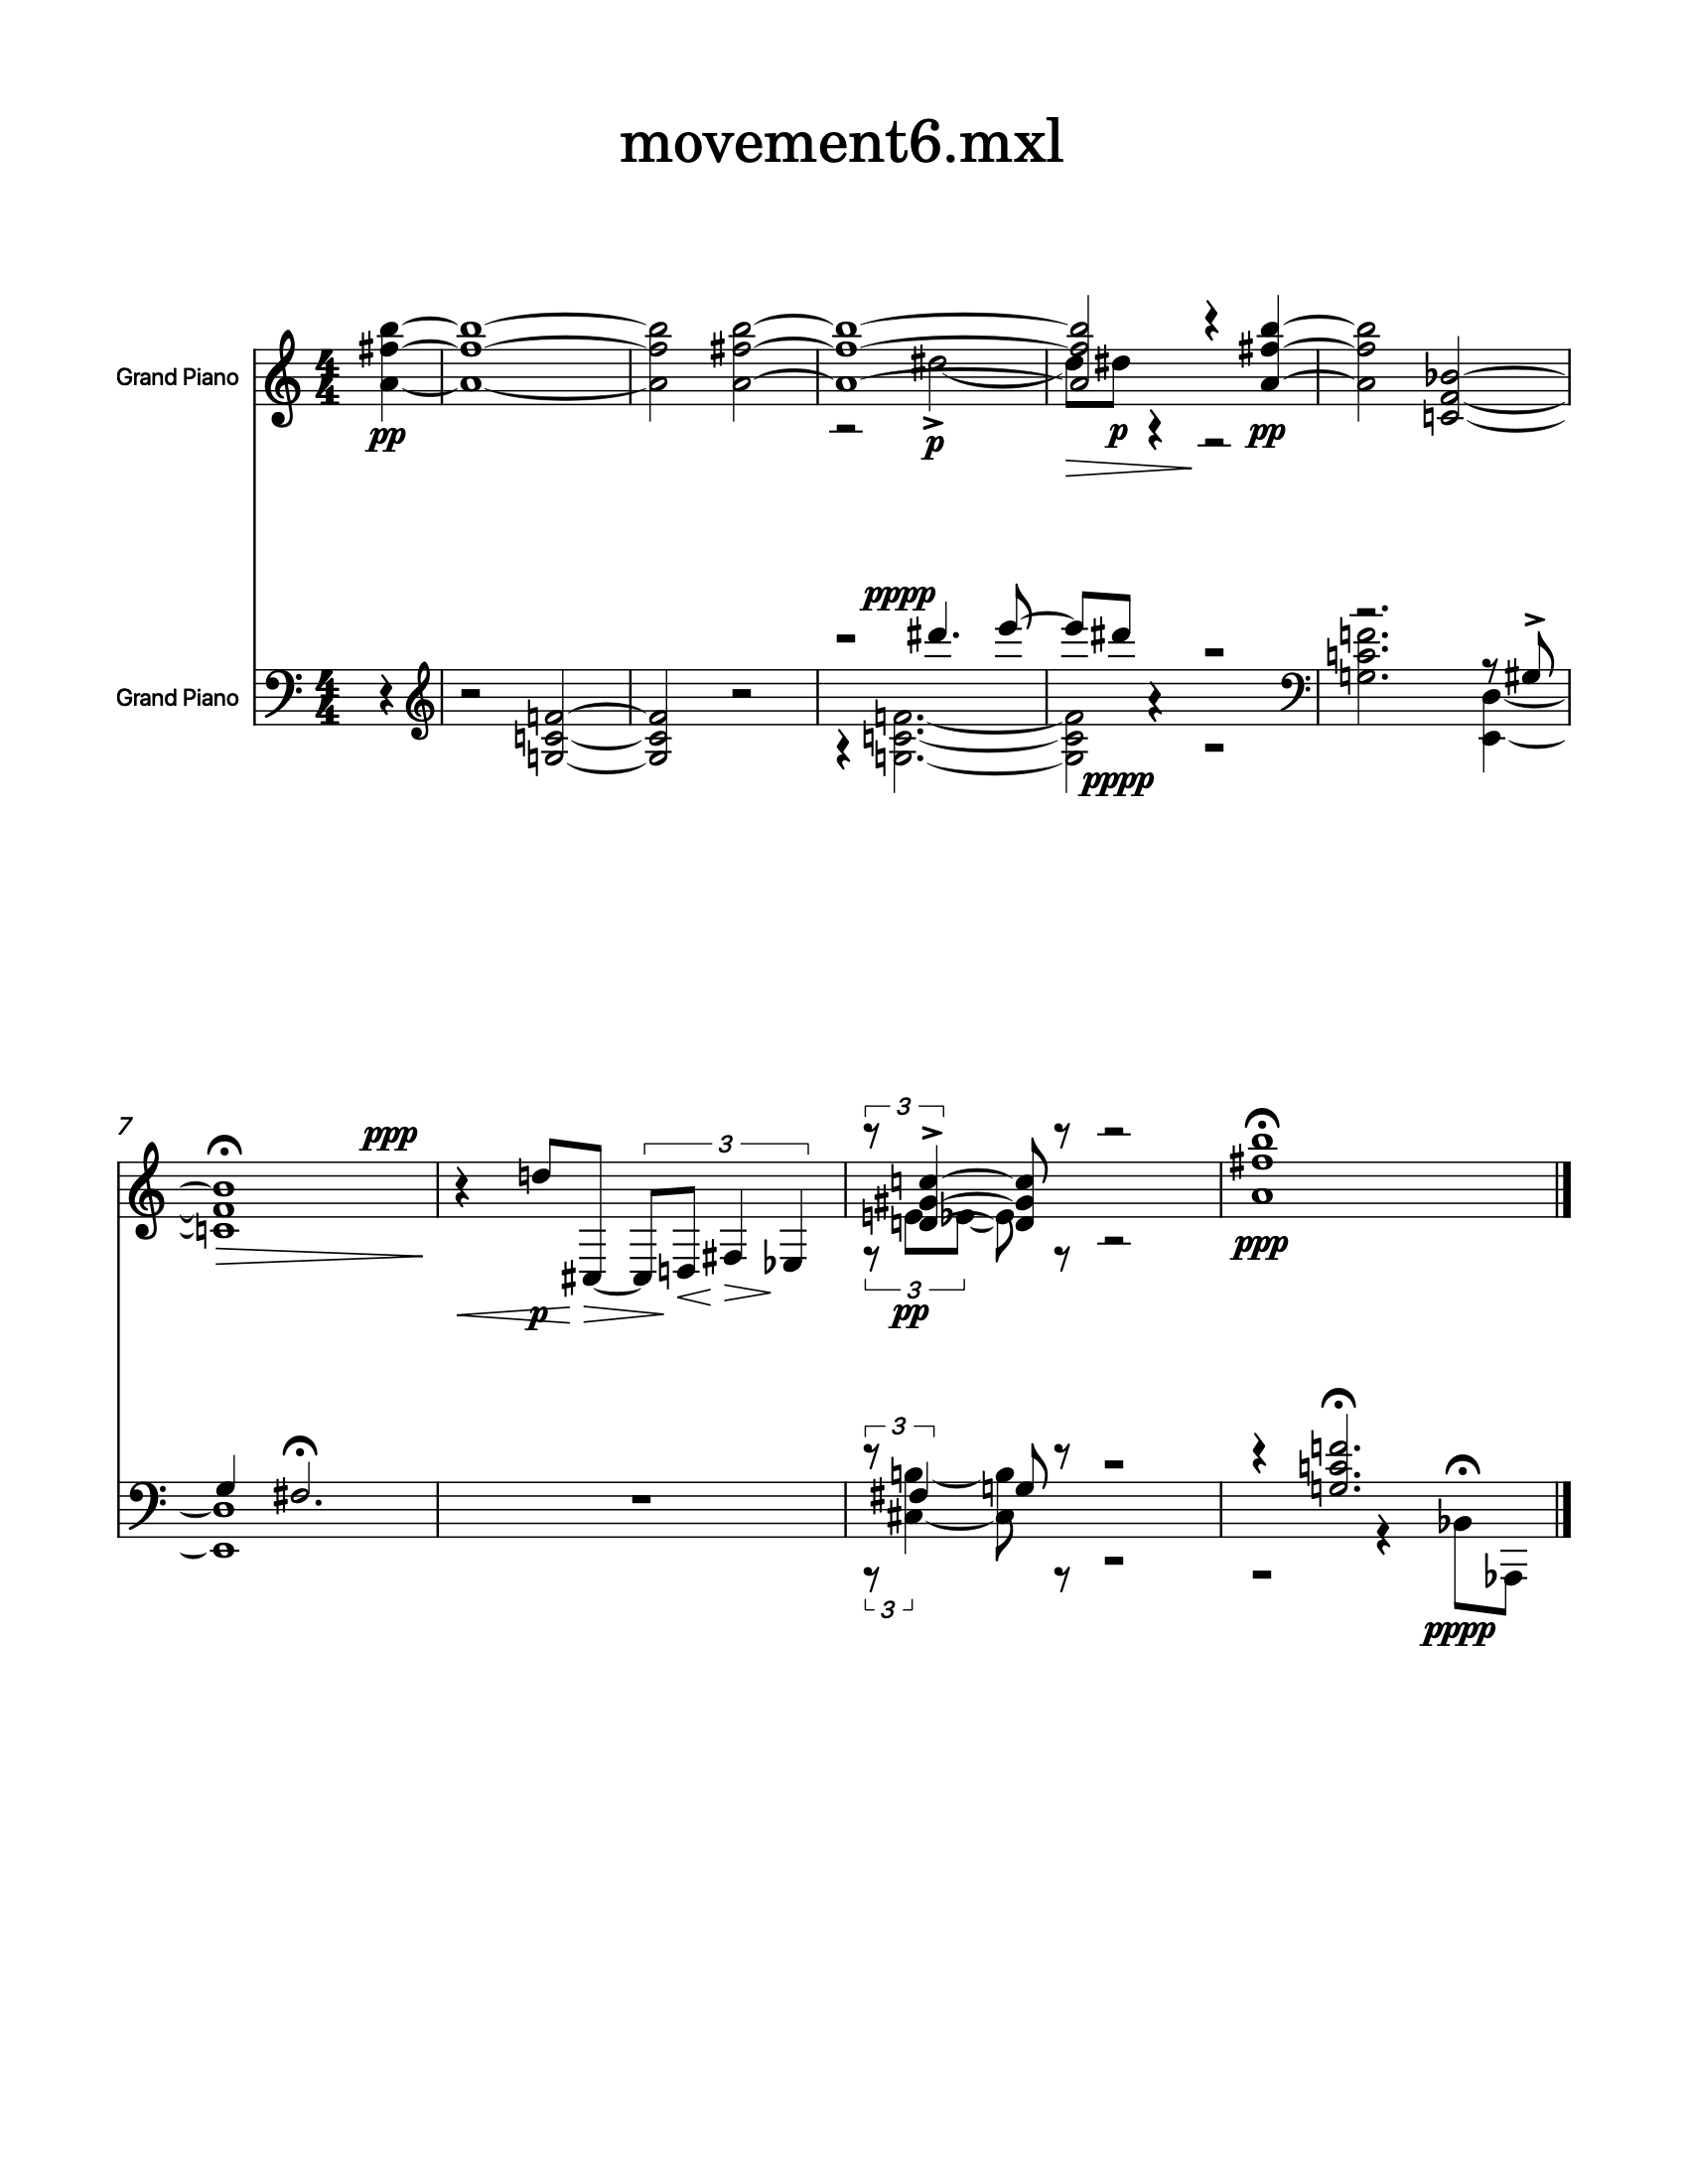

In [32]:
schoenberg = corpus.parse('schoenberg/opus19', 6)
schoenberg.show()

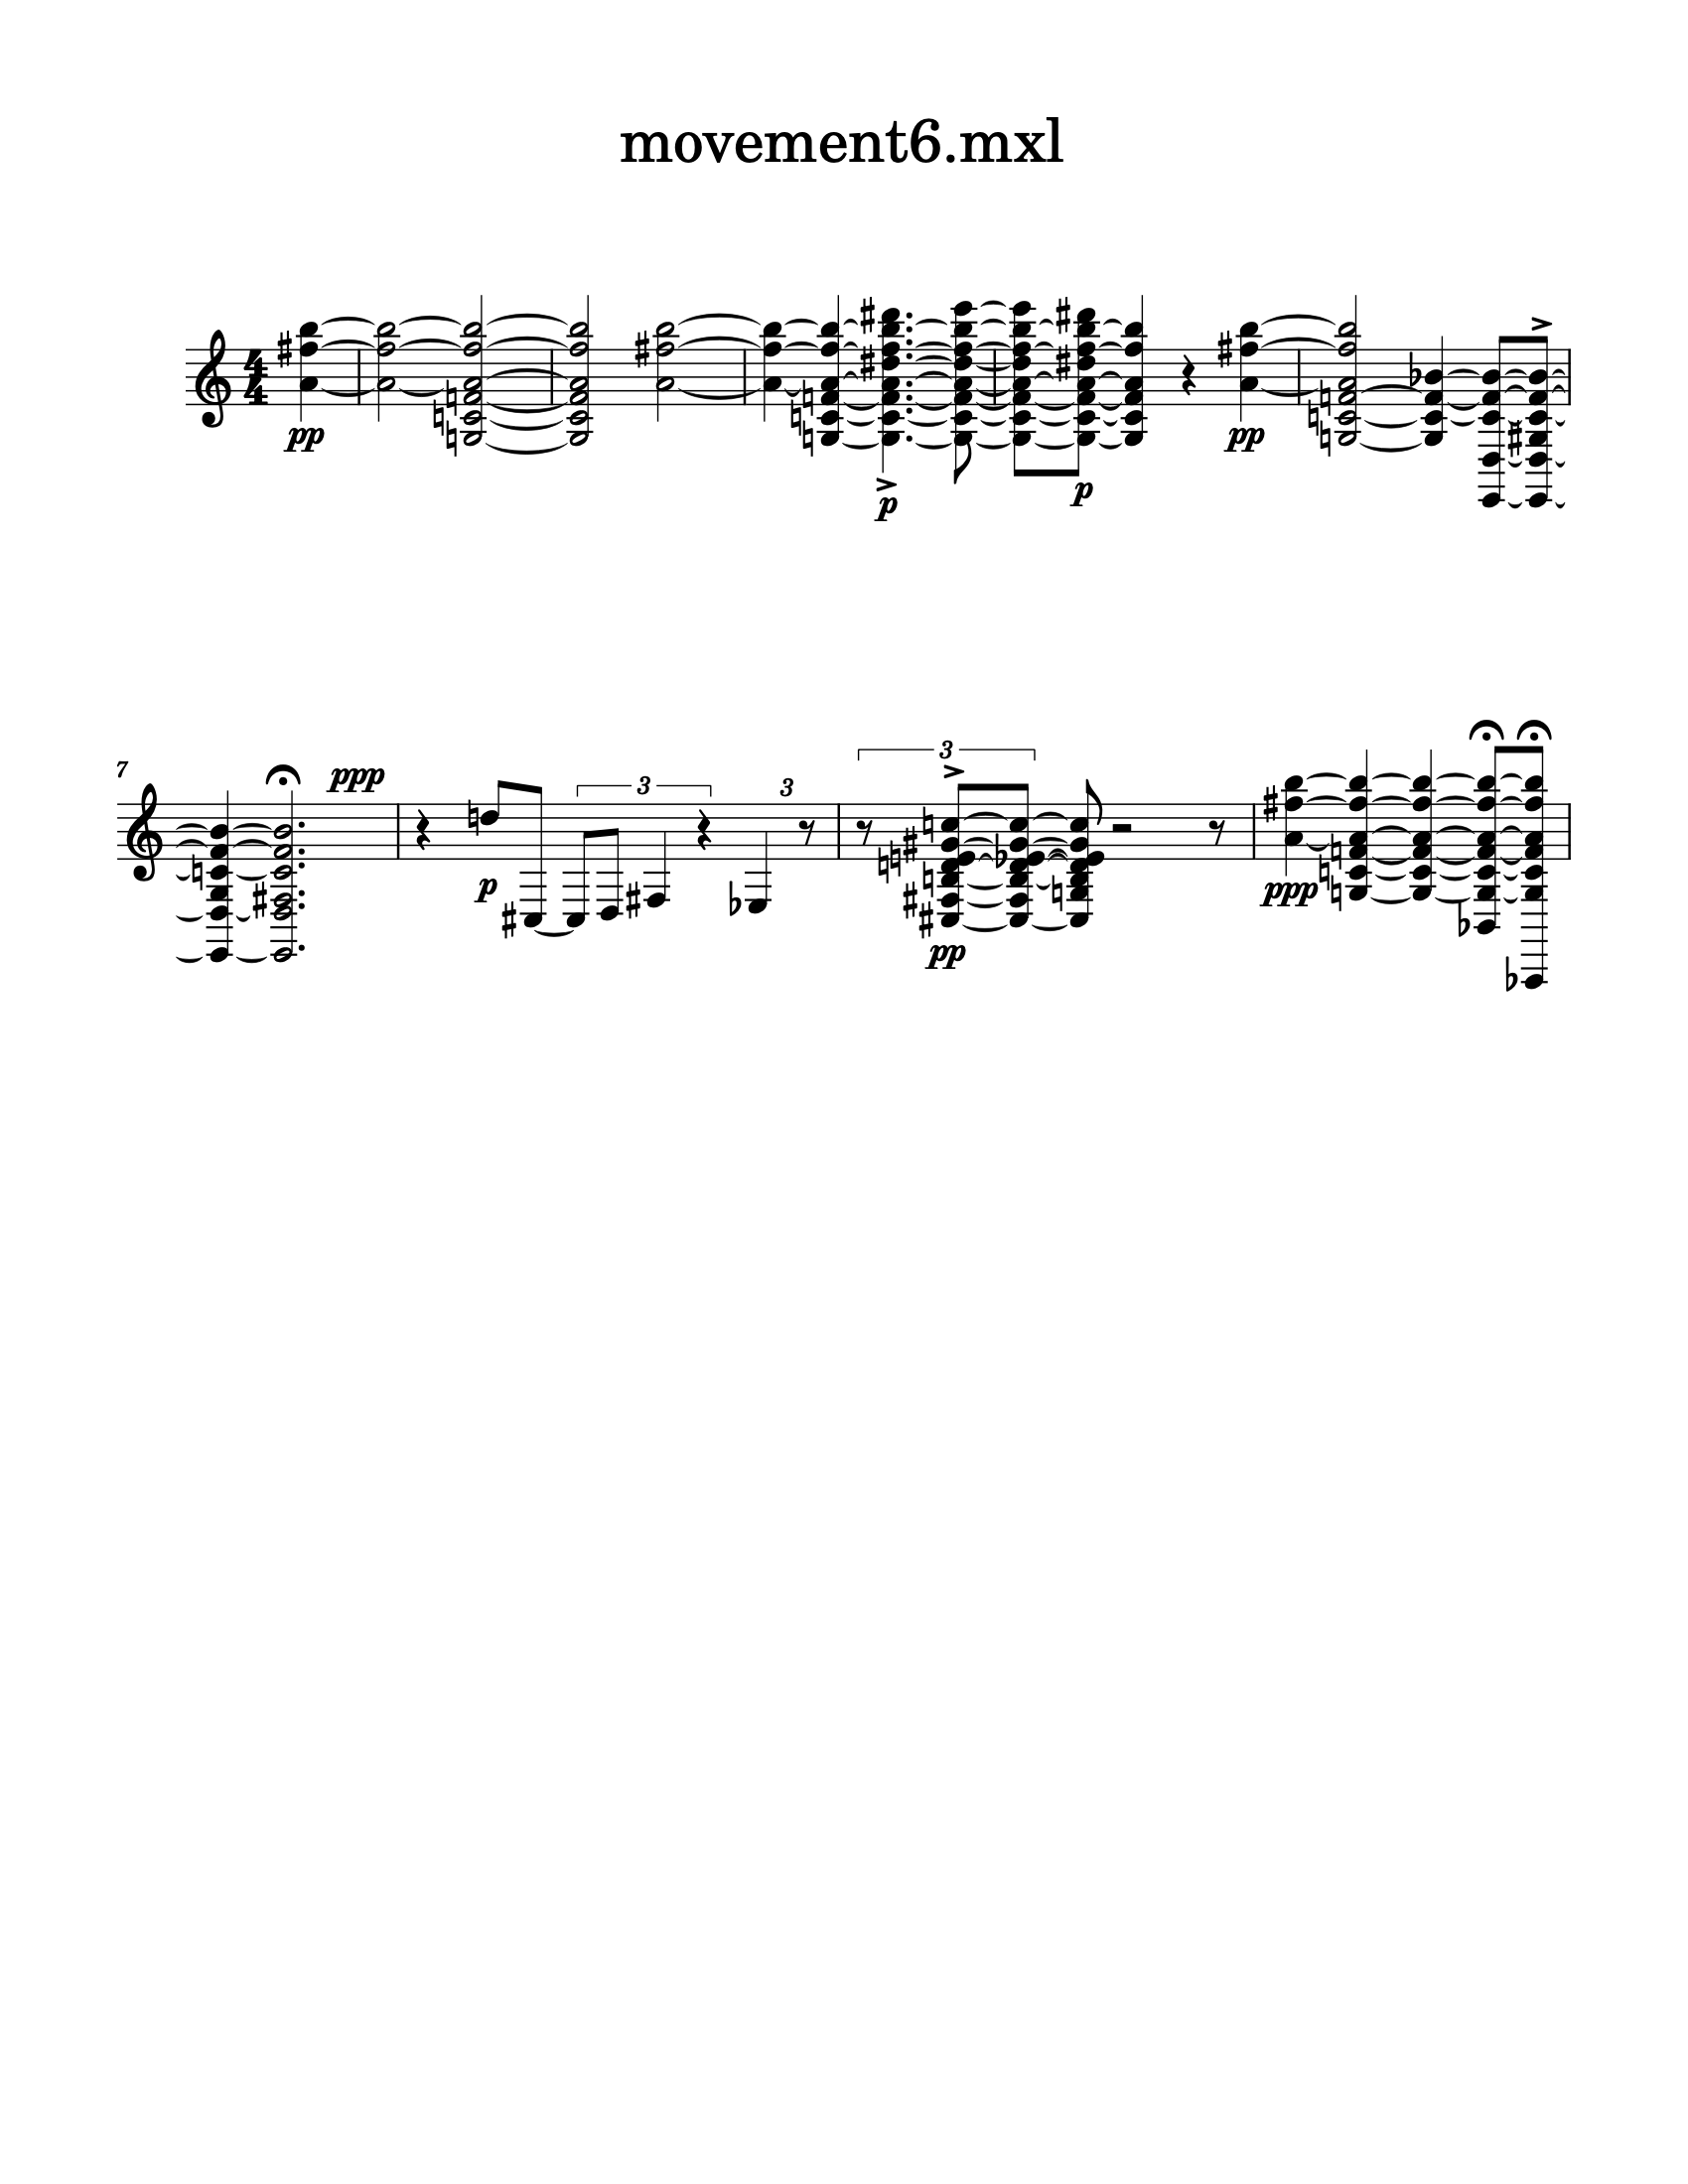

In [33]:
chorded = schoenberg.chordify()
chorded.show()